# Q1. 
Build linear and logistic regression using gradient descent on numpy only (Do not use other libraries like sklearn). Dataset for linear regressions can be found [here](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). Dataset for logistic regression can be found [here](https://drive.google.com/file/d/1CReNesgs3iqZi08rr5a1h0YOci0BmC6H/view). The main focus here is not the accuracy of the model but the implementation of these algorithms from scratch. 


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %load_ext autoreload
# %autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [42]:
# df = pd.read_csv(r"C:\Users\KUDSIT\Desktop\rahul\databeat-task\Databeat AI\ML\dataset\winequality-red.csv",sep=";")
# df.head()

df = pd.read_csv(r"D:\This PC\Desktop\task\databeat-task\Databeat AI\ML\dataset\winequality-red.csv",sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Data stats

In [ ]:
# df['quality'].value_counts()

In [ ]:
# df.describe()

In [ ]:
# df.shape

### preprocessing

In [43]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [44]:
# No missing / Null value in either rows or columns

dub_df=df.copy()
dub_df.drop_duplicates(subset=None,inplace=True)

print(dub_df.shape)
print(df.shape)

# The shape is not same. Hence there were duplicate values in the dataset
df=dub_df

(1359, 12)
(1599, 12)


### data visualization

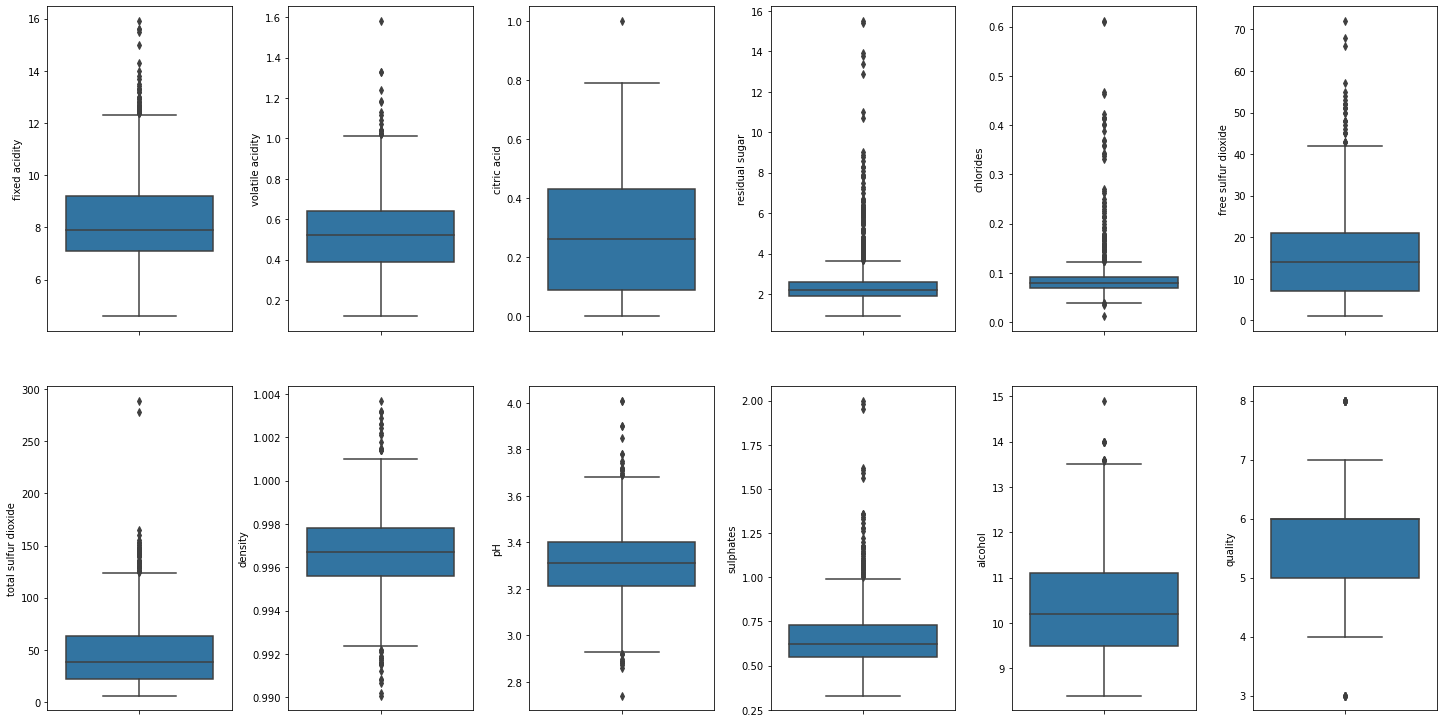

In [ ]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

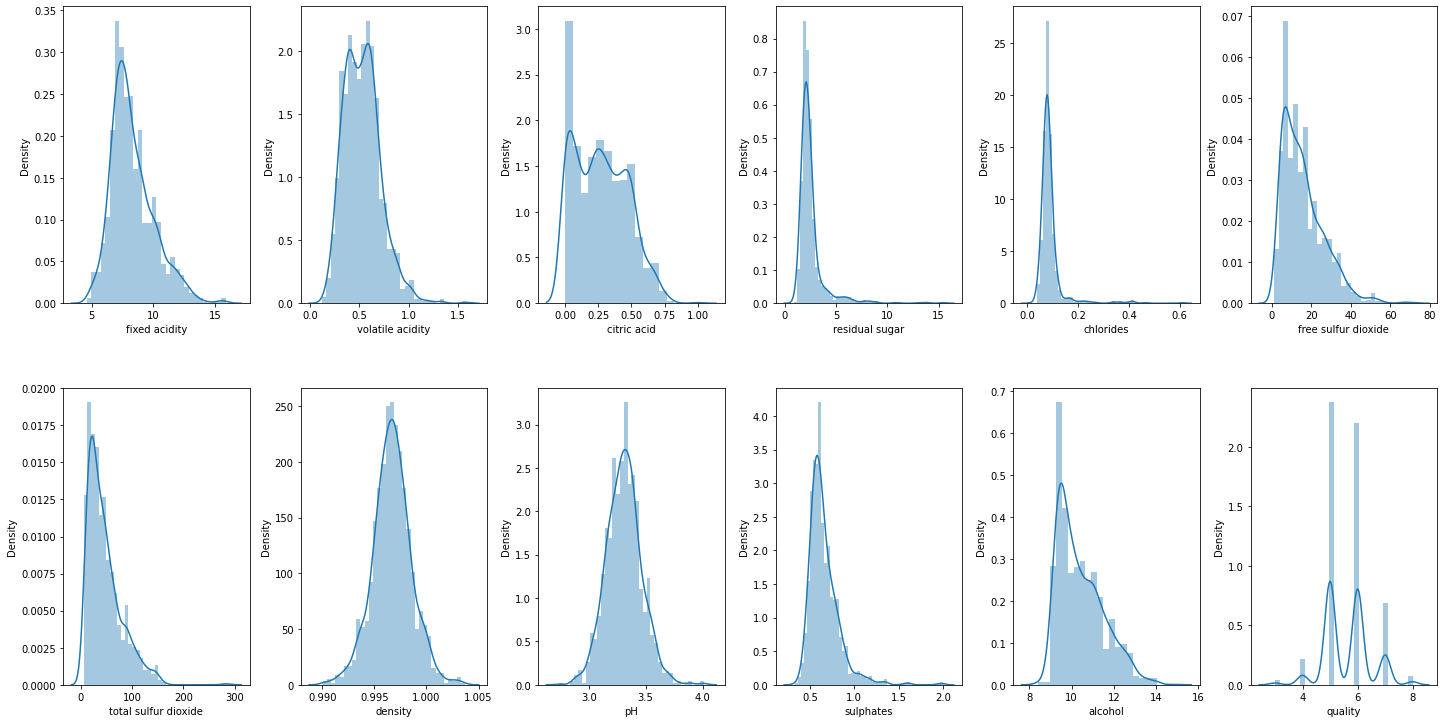

In [ ]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

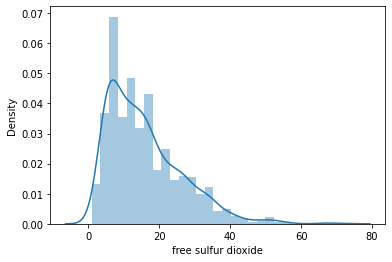

In [ ]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

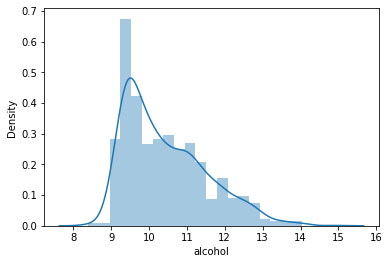

In [ ]:
sns.distplot(df['alcohol'])


<AxesSubplot:xlabel='sulphates', ylabel='Density'>

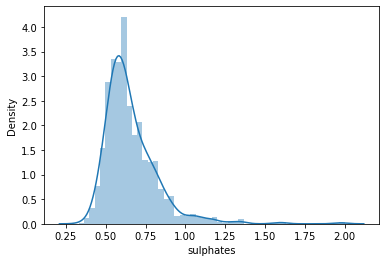

In [ ]:
sns.distplot(df["sulphates"])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

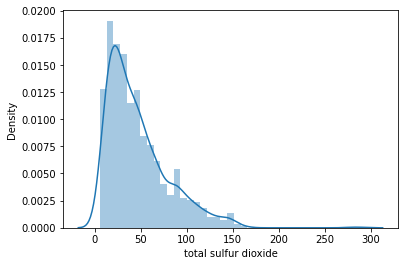

In [ ]:
sns.distplot(df["total sulfur dioxide"])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

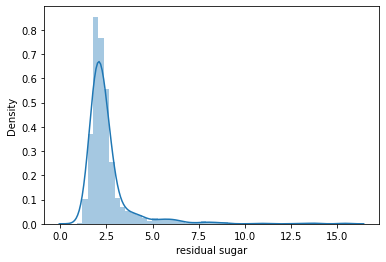

In [ ]:
sns.distplot(df["residual sugar"])

AxesSubplot(0.125,0.125;0.775x0.755)


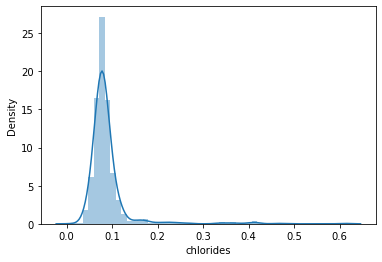

In [ ]:
print(sns.distplot(df["chlorides"]))

In [ ]:
# log transformation
df['free sulfur dioxide'] = np.log(1+df['free sulfur dioxide'])
df['alcohol'] = np.log(1+df['alcohol'])
df['sulphates'] = np.log(1+df['sulphates'])
df['total sulfur dioxide'] = np.log(1+df['total sulfur dioxide'])
df['residual sugar'] = np.log(1+df['residual sugar'])
df['chlorides'] = np.log(1+df['chlorides'])


AxesSubplot(0.125,0.125;0.775x0.755)


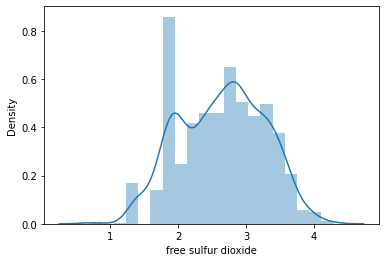

In [ ]:
print(sns.distplot(df['free sulfur dioxide']))

AxesSubplot(0.125,0.125;0.775x0.755)


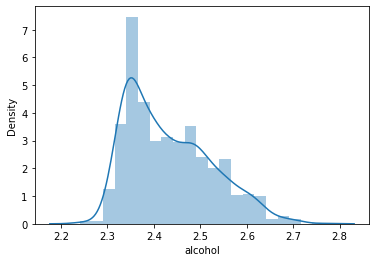

In [ ]:
print(sns.distplot(df['alcohol']))

AxesSubplot(0.125,0.125;0.775x0.755)


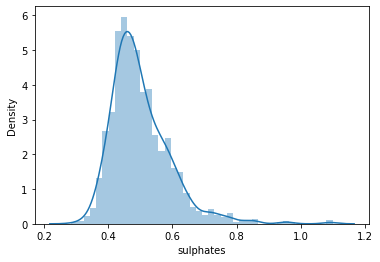

In [ ]:
print(sns.distplot(df['sulphates']))

AxesSubplot(0.125,0.125;0.775x0.755)


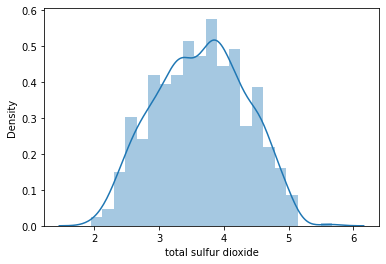

In [ ]:
print(sns.distplot(df['total sulfur dioxide']))

AxesSubplot(0.125,0.125;0.775x0.755)


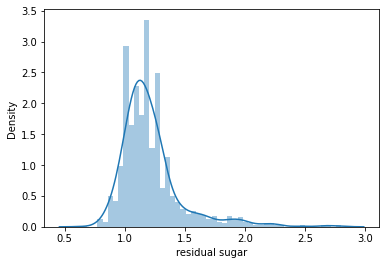

In [ ]:
print(sns.distplot(df['residual sugar']))

AxesSubplot(0.125,0.125;0.775x0.755)


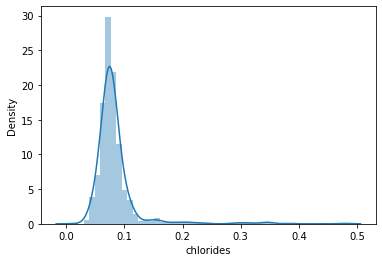

In [ ]:
print(sns.distplot(df['chlorides']))

In [ ]:
# round(100*(df.isnull().sum()/len(df)),2).sort_values(ascending=False)
# round(100*(df.isnull().sum(axis=1)/len(df)),2).sort_values(ascending=False)

<AxesSubplot:xlabel='quality', ylabel='count'>

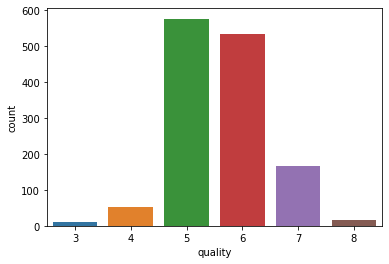

In [ ]:
sns.countplot(df['quality'])

### model creation

In [45]:
from sklearn.model_selection import train_test_split
x= df.iloc[:,:11]
y = df['quality']
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
x_train = X_scaler.fit_transform(x_train)
#y_train = y_scaler.fit_transform(y_train)
x_test = X_scaler.transform(x_test)
#y_test = y_scaler.transform(y_test)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [48]:
# y_train = y_scaler.fit_transform(y_train)
# y_test=y_scaler.fit_transform(y_test)

In [49]:
# def Normalizer(data):
#     data = data.apply( lambda value:(value - value.mean())/value.std(), axis =0)

#     return np.array(data)

In [50]:
# x_train = Normalizer(x_train)
# x_test = Normalizer(x_test)
# np.array(x_train).reshape(-1,1)

In [51]:
x_train

array([[ 3.31616196, -0.67010558,  1.8291926 , ..., -1.99985681,
         0.90236307,  0.35241996],
       [ 0.51968377, -0.387402  , -0.21861594, ..., -1.0626813 ,
        -0.86300883, -0.93981891],
       [ 2.44226252, -0.387402  ,  1.8291926 , ..., -2.13373903,
         1.25543745, -0.2013967 ],
       ...,
       [-0.87855533, -0.33086129, -0.98654415, ..., -0.05856467,
        -0.03916861, -0.75521335],
       [ 0.34490388, -1.17897203,  0.19094577, ..., -0.92879908,
        -0.62762591, -0.01679115],
       [ 0.4614238 , -1.06589059,  0.75409311, ..., -0.86185797,
        -0.62762591,  0.90623661]])

In [52]:
x_train

array([[ 3.31616196, -0.67010558,  1.8291926 , ..., -1.99985681,
         0.90236307,  0.35241996],
       [ 0.51968377, -0.387402  , -0.21861594, ..., -1.0626813 ,
        -0.86300883, -0.93981891],
       [ 2.44226252, -0.387402  ,  1.8291926 , ..., -2.13373903,
         1.25543745, -0.2013967 ],
       ...,
       [-0.87855533, -0.33086129, -0.98654415, ..., -0.05856467,
        -0.03916861, -0.75521335],
       [ 0.34490388, -1.17897203,  0.19094577, ..., -0.92879908,
        -0.62762591, -0.01679115],
       [ 0.4614238 , -1.06589059,  0.75409311, ..., -0.86185797,
        -0.62762591,  0.90623661]])

In [53]:
y_train

array([[6],
       [5],
       [5],
       [6],
       [5],
       [5],
       [6],
       [5],
       [5],
       [5],
       [6],
       [5],
       [5],
       [6],
       [6],
       [4],
       [6],
       [5],
       [6],
       [7],
       [5],
       [6],
       [6],
       [6],
       [5],
       [5],
       [5],
       [5],
       [6],
       [5],
       [6],
       [4],
       [5],
       [5],
       [5],
       [7],
       [5],
       [6],
       [6],
       [6],
       [6],
       [7],
       [5],
       [6],
       [5],
       [6],
       [5],
       [6],
       [7],
       [6],
       [7],
       [6],
       [5],
       [6],
       [7],
       [5],
       [5],
       [5],
       [4],
       [5],
       [7],
       [7],
       [6],
       [4],
       [6],
       [5],
       [6],
       [8],
       [6],
       [5],
       [5],
       [6],
       [5],
       [5],
       [6],
       [7],
       [8],
       [6],
       [7],
       [6],
       [5],
       [5],
       [5],
    

In [54]:
x_test

array([[-0.35421567,  0.51724945, -1.191325  , ...,  0.20919976,
        -0.74531737, -0.84751613],
       [-0.06291586,  0.60206053, -0.88415372, ..., -0.12550578,
         0.54928869,  0.44472273],
       [ 0.05360407, -0.89626845,  0.80528833, ..., -0.92879908,
         0.90236307,  0.72163106],
       ...,
       [ 0.34490388,  0.3476273 ,  0.60050747, ...,  0.41002309,
        -0.45108872, -0.10909392],
       [ 0.9275035 , -1.17897203,  1.4708261 , ..., -1.0626813 ,
         0.43159723,  0.90623661],
       [ 1.04402343, -1.23551274,  0.39572662, ..., -0.46021132,
         1.02005453,  0.72163106]])

In [13]:
# y_test=y_scaler.fit_transform(y_test)
# y_test

## Liner Regression


In [55]:
X1 = x_train
Y1 = y_train
X2 = x_test

In [56]:
# Building the model
m = 0
b = 0

L = 0.005  # The learning Rate
epochs = 100  # The number of iterations to perform gradient descent

n = len(X1) # Number of elements in X1
costs = []
# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X1 + b  # The current predicted value of Y1
    cost = np.sum([val**2 for val in (Y1-Y_pred)])/n
    cost = np.squeeze(np.array(cost))
    costs.append(cost)
    D_m = (-2/n) * np.sum(X1 * (Y1 - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * np.sum(Y1 - Y_pred)  # Derivative wrt b
    m = m - L * D_m  # Update m
    b = b - L * D_c  # Update b
    print("cost {}, epochs {}".format(cost,i))
print (m, b)

cost 355.4584647739222, epochs 0
cost 283.10948751048835, epochs 1
cost 225.80186262012236, epochs 2
cost 180.40849294446352, epochs 3
cost 144.45240482437413, epochs 4
cost 115.97158742445133, epochs 5
cost 93.41193196197248, epochs 6
cost 75.54242887014298, epochs 7
cost 61.387995471104816, epochs 8
cost 50.1762687757267, epochs 9
cost 41.29546006031769, epochs 10
cost 34.260971476842215, epochs 11
cost 28.68895306987129, epochs 12
cost 24.275357289709618, epochs 13
cost 20.77934807224356, epochs 14
cost 18.010159171088706, epochs 15
cost 15.81668464248394, epochs 16
cost 14.0792334683761, epochs 17
cost 12.702998393365279, epochs 18
cost 11.612882590449217, epochs 19
cost 10.749401862959408, epochs 20
cost 10.065438778714727, epochs 21
cost 9.523671619684515, epochs 22
cost 9.094537853016684, epochs 23
cost 8.754620996439094, epochs 24
cost 8.485372854343984, epochs 25
cost 8.272101400990445, epochs 26
cost 8.10316908278911, epochs 27
cost 7.969357793541831, epochs 28
cost 7.8633658

In [57]:
# Making predictions
Y_pred = m*X2 + b
print(Y_pred)

[[5.62144448 5.62910162 5.61408922 ... 5.62639494 5.61800807 5.6171101 ]
 [5.62400399 5.62984681 5.61678818 ... 5.62345405 5.62938313 5.62846436]
 [5.62502779 5.61668173 5.63163247 ... 5.6163959  5.63248542 5.63089742]
 ...
 [5.6275873  5.62761123 5.62983316 ... 5.62815947 5.62059331 5.62359825]
 [5.63270632 5.61419776 5.63748022 ... 5.61521955 5.62834903 5.63251946]
 [5.63373012 5.61370096 5.62803386 ... 5.62051315 5.63351952 5.63089742]]


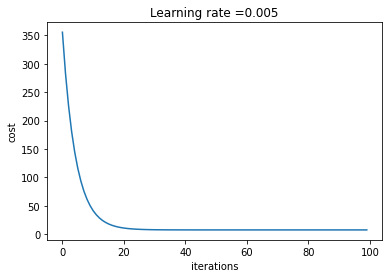

In [58]:
# Plot learning curve (with costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(L))
plt.show()


## Logistic Regression

In [59]:

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    #(≈ 1 line of code)
    # s = ...
    # YOUR CODE STARTS HERE
    s = 1/(1+np.exp(-z))
    
    # YOUR CODE ENDS HERE
    
    return s

In [78]:
# # Building the model
# m = 0
# b = 0

# L = 0.0001  # The learning Rate or step size 
# epochs = 10000  # The number of iterations to perform gradient descent

# n = len(X1) # Number of elements in X1
# costs = []
# # Performing Gradient Descent 
# for i in range(epochs): 
#     Y_pred = sigmoid(np.dot(m,X1) + b)  # The current predicted value of Y1
#     cost = np.sum([val**2 for val in (Y1-Y_pred)])/n
#     # cost = -(np.sum((np.log(Y_pred)*Y1)+((np.log(1-Y_pred))*(1-Y1))))/n
#     cost = np.squeeze(np.array(cost))
#     costs.append(cost)
#     D_m = (-2/n) * np.sum(X1 * (Y1 - Y_pred))  # Derivative wrt m
#     D_c = (-2/n) * np.sum(Y1 - Y_pred)  # Derivative wrt b
#     m = m - L * D_m  # Update m
#     b = b - L * D_c  # Update b
#     print("cost {}, epochs {}".format(cost,i))
# print (m, b)

cost 296.33780231335436, epochs 0
cost 296.0201269702256, epochs 1
cost 295.702821121651, epochs 2
cost 295.3859044116766, epochs 3
cost 295.0693963532452, epochs 4
cost 294.75331632372456, epochs 5
cost 294.4376835605192, epochs 6
cost 294.12251715676825, epochs 7
cost 293.8078360571328, epochs 8
cost 293.4936590536702, epochs 9
cost 293.18000478180227, epochs 10
cost 292.8668917163738, epochs 11
cost 292.5543381678068, epochs 12
cost 292.2423622783491, epochs 13
cost 291.9309820184195, epochs 14
cost 291.62021518305085, epochs 15
cost 291.3100793884318, epochs 16
cost 291.00059206854763, epochs 17
cost 290.6917704719225, epochs 18
cost 290.3836316584618, epochs 19
cost 290.0761924963974, epochs 20
cost 289.7694696593353, epochs 21
cost 289.46347962340553, epochs 22
cost 289.1582386645166, epochs 23
cost 288.8537628557135, epochs 24
cost 288.5500680646393, epochs 25
cost 288.24716995110185, epochs 26
cost 287.94508396474436, epochs 27
cost 287.6438253428207, epochs 28
cost 287.3434091

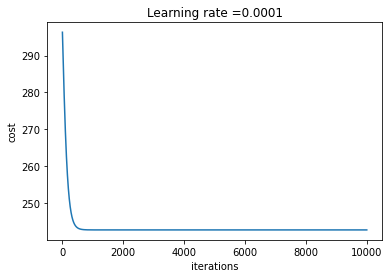

In [79]:
# # Plot learning curve (with costs)
# plt.plot(costs)
# plt.ylabel('cost')
# plt.xlabel('iterations')
# plt.title("Learning rate =" + str(L))
# plt.show()

![](https://www.simplilearn.com/ice9/free_resources_article_thumb/CostFunctionforNeuralNetworks_3.png)
<!-- ![MarineGEO circle logo](https://editor.analyticsvidhya.com/uploads/90149Capture0.PNG "Logistic Regression fromula") -->

In [99]:
# Building the model
m = 0
b = 0

L = 0.0001  # The learning Rate or step size 
epochs = 500  # The number of iterations to perform gradient descent

n = len(X1) # Number of elements in X1
costs = []
# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = sigmoid(np.dot(m,X1) + b)  # The current predicted value of Y1
    cost = np.sum([val**2 for val in (Y1-(np.dot(m,X1) + b))])/n
    # cost = np.sum((Y1-((m*x1)+b)))/n
    # cost = -(np.sum((np.log(Y_pred)*Y1)+((np.log(1-Y_pred))*(1-Y1))))/n
    cost = np.squeeze(np.array(cost))
    costs.append(cost)
    D_m = (-2/n) * np.sum(X1 * (Y1 - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * np.sum(Y1 - Y_pred)  # Derivative wrt b
    m = m - L * D_m  # Update m
    b = b - L * D_c  # Update b
    print("cost {}, epochs {}".format(cost,i))
print (m, b)

cost 355.4584647739222, epochs 0
cost 354.0647831161452, epochs 1
cost 352.6746620102428, epochs 2
cost 351.28809637695196, epochs 3
cost 349.9050810954126, epochs 4
cost 348.52561100385446, epochs 5
cost 347.1496809002929, epochs 6
cost 345.7772855432315, epochs 7
cost 344.4084196523728, epochs 8
cost 343.0430779093358, epochs 9
cost 341.681254958381, epochs 10
cost 340.32294540714133, epochs 11
cost 338.9681438273599, epochs 12
cost 337.61684475563317, epochs 13
cost 336.26904269416036, epochs 14
cost 334.92473211149775, epochs 15
cost 333.58390744331786, epochs 16
cost 332.24656309317413, epochs 17
cost 330.91269343326906, epochs 18
cost 329.5822928052264, epochs 19
cost 328.25535552086825, epochs 20
cost 326.93187586299393, epochs 21
cost 325.6118480861633, epochs 22
cost 324.29526641748214, epochs 23
cost 322.98212505739014, epochs 24
cost 321.67241818045136, epochs 25
cost 320.3661399361458, epochs 26
cost 319.0632844496638, epochs 27
cost 317.76384582270003, epochs 28
cost 316.4

In [101]:
# Making predictions
Y_pred = sigmoid(np.dot(m,X1) + b)
print(Y_pred)

[[0.99482727 0.9946303  0.99475465 ... 0.99456294 0.99470887 0.99468152]
 [0.99468986 0.99464451 0.99465298 ... 0.9946105  0.99462058 0.9946167 ]
 [0.99478472 0.99464451 0.99475465 ... 0.99455612 0.99472636 0.99465384]
 ...
 [0.99461979 0.99464735 0.99461435 ... 0.99466099 0.99466196 0.99462601]
 [0.99468115 0.99460462 0.99467347 ... 0.99461726 0.99463244 0.99466308]
 [0.99468696 0.99461034 0.99470151 ... 0.99462064 0.99463244 0.99470907]]


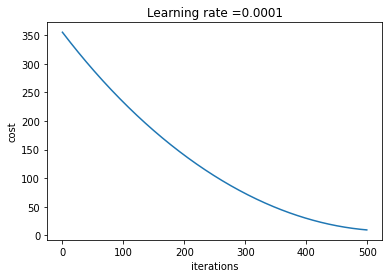

In [100]:
# Plot learning curve (with costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(L))
plt.show()

# Q2. 
Use pandas to extract insights on this [dataset](https://drive.google.com/file/d/1Fwxy08NgMAVcUvsRVd94KEiqgmYSvOKA/view)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r"D:\This PC\Desktop\task\databeat-task\Databeat AI\ML\dataset\movie_metadata.csv")

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
len(df)

5043

In [ ]:
df.shape

(5043, 28)

In [ ]:
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [ ]:
df.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
df["color"] == "NaN"

0       False
1       False
2       False
3       False
4       False
        ...  
5038    False
5039    False
5040    False
5041    False
5042    False
Name: color, Length: 5043, dtype: bool

In [ ]:
df.columns


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')